In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
import pytesseract

In [3]:
img_path = "id.webp"

In [4]:
img = cv2.imread(img_path)

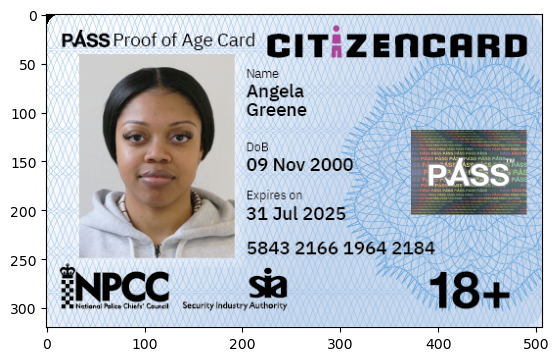

In [5]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

In [6]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [7]:
custom_config = r'--oem 3 --psm 3 -l eng+osd --tessdata-dir "C:\\Program Files\\Tesseract-OCR\\tessdata" -c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
text = pytesseract.image_to_string(gray_img, config=custom_config)

In [8]:
text

'i\nPASSProofofAgeCard CITZENCARD\n\nName\nAngela\nGreene\n\nDoB\n09Nov2000\n\nExpireson\n\n34Jul2025\nof 5843216619642184\n\n'

In [9]:
import keras_ocr

In [10]:
keras_ocr.__version__

'0.9.3'

In [11]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\skaur\.keras-ocr\craft_mlt_25k.h5

Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.

Looking for C:\Users\skaur\.keras-ocr\crnn_kurapan.h5


In [12]:
images = [
    keras_ocr.tools.read(img) for img in ["pan1.webp",
                                         "pan2.jpg"]
]

2/2 [==============================] - 6s 633ms/step


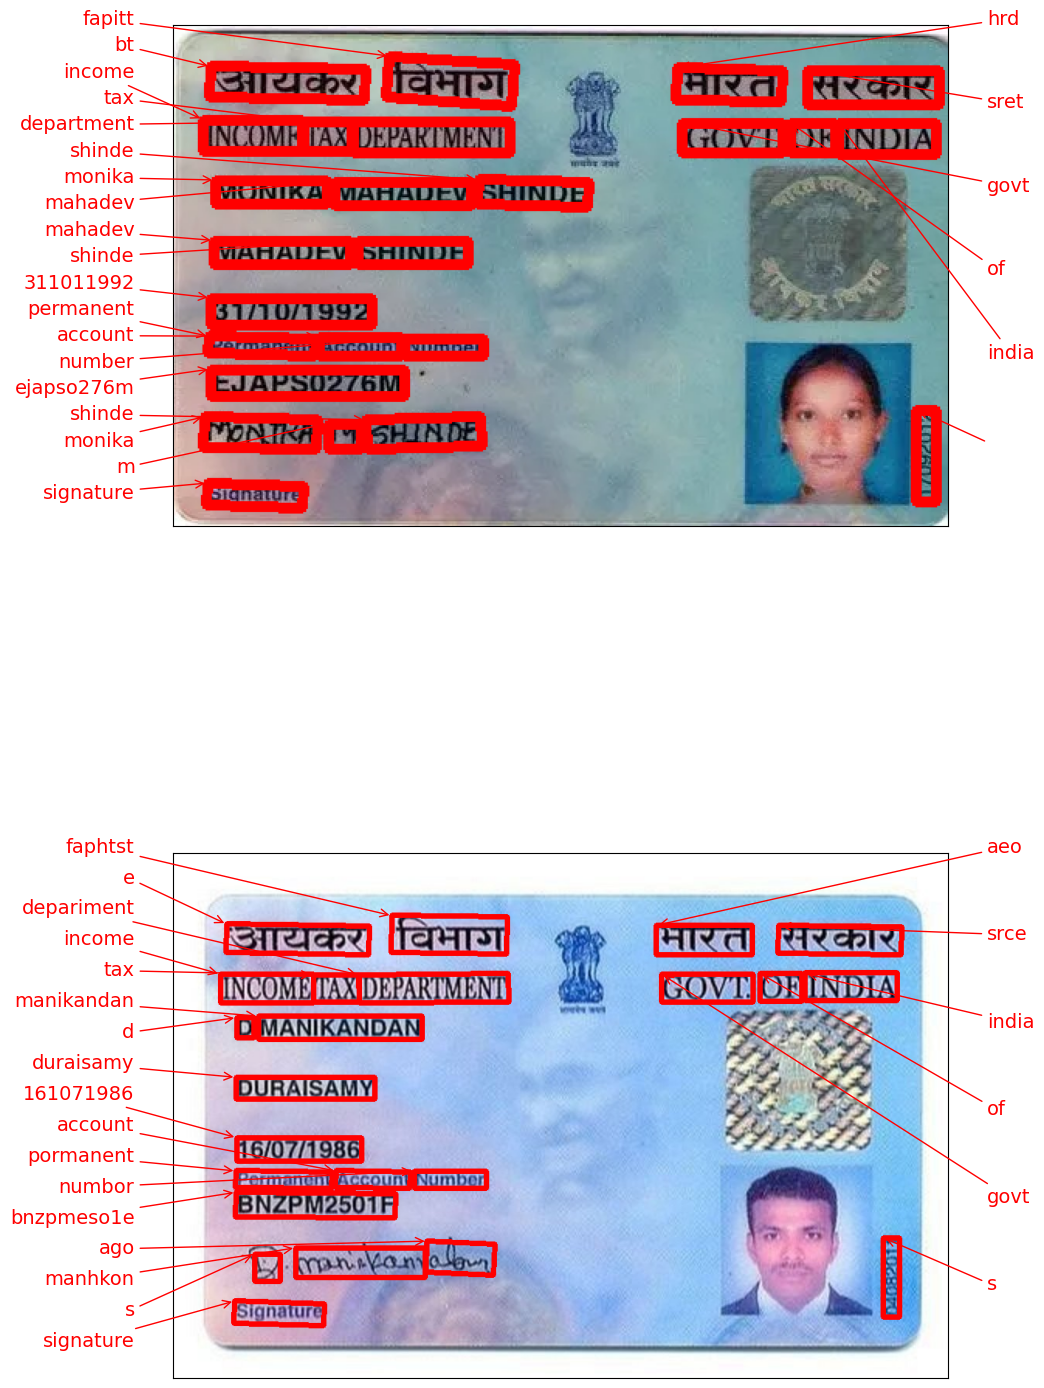

In [13]:
prediction_groups = pipeline.recognize(images)

fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image,
                                   predictions=predictions,
                                   ax=ax)